In [10]:
# import sqlalchemy as db
import mysql.connector as db
import plotly.express as px
# import plotly.graph_objects as go
import pandas as pd

In [11]:
cn = db.connect(host='localhost',database='lns_finance',user='horace',password='Luv!270211')
# db_Info = connection.get_server_info()
# print("Connected to MySQL Server version ", db_Info)

In [12]:
cursor = cn.cursor()
query = ("select trans_month_num, sum(trans_amount_php) as Amount from journal_view_1 where trans_year = %s and trans_type = 'Income' group by 1 order by 1")
current_year = 2020
cursor.execute(query, (current_year,))
rows = cursor.fetchall()

#for (trans_month_num, amount) in rows:
#    print("{}, {}".format(trans_month_num, amount))

In [13]:
# df = pd.DataFrame( [[ij for ij in i] for i in rows] )
df = pd.DataFrame(rows)
df.rename(columns={0: 'Month', 1: 'Amount'}, inplace=True);
print(df)

   Month   Amount
0      1  3171325
1      2  2879445
2      3  1150510
3      7   369200
4      8   595850
5      9   765295
6     10   759950
7     11  1107750
8     12  1096850


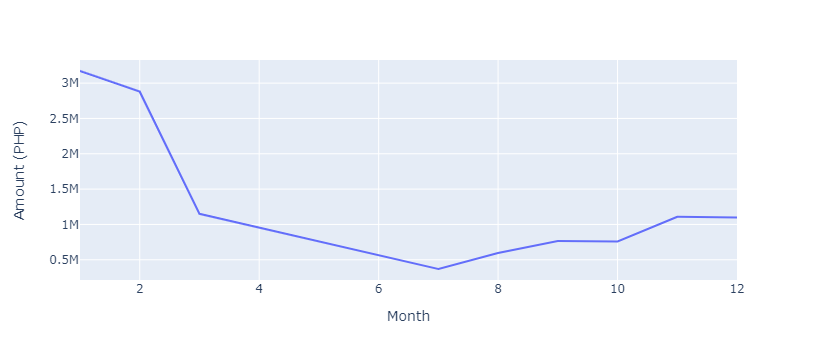

In [15]:
fig = px.line(df, x="Month", y="Amount", hover_data=["Amount"], labels = {"Amount" : "Amount (PHP)"})
fig.show()